In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis

In [2]:
file_path = "/content/supermarket_sales - (1).csv"
df = pd.read_csv(file_path)

In [3]:
column = "Total"

# Compute mean and standard deviation
mean_value = df[column].mean()
std_dev_value = df[column].std()
print(f"Mean: {mean_value:.2f}, Standard Deviation: {std_dev_value:.2f}")


Mean: 322.966749, Standard Deviation: 245.88533510097207


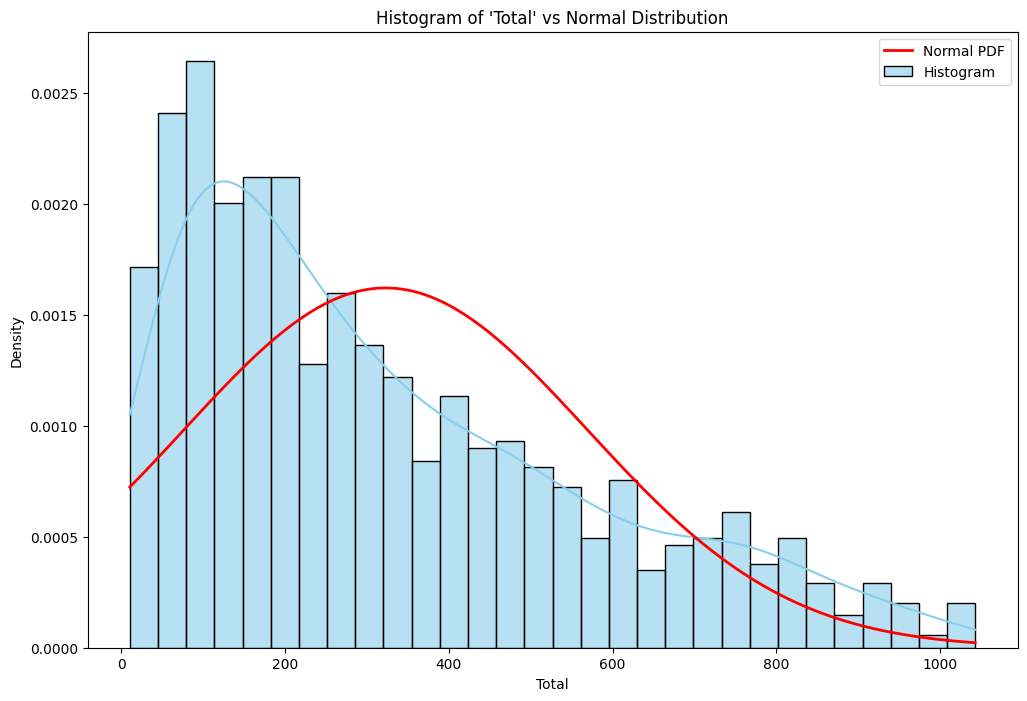

In [13]:
plt.figure(figsize=(12, 8))
sns.histplot(df[column], kde=True, bins=30, color='skyblue', alpha=0.6, stat="density", label="Histogram")
x = np.linspace(df[column].min(), df[column].max(), 100)
pdf_values = norm.pdf(x, mean_value, std_dev_value)
plt.plot(x, pdf_values, 'r-', lw=2, label="Normal PDF")
plt.xlabel("Total")
plt.ylabel("Density")
plt.title("Histogram of 'Total' vs Normal Distribution")
plt.legend()
plt.show()

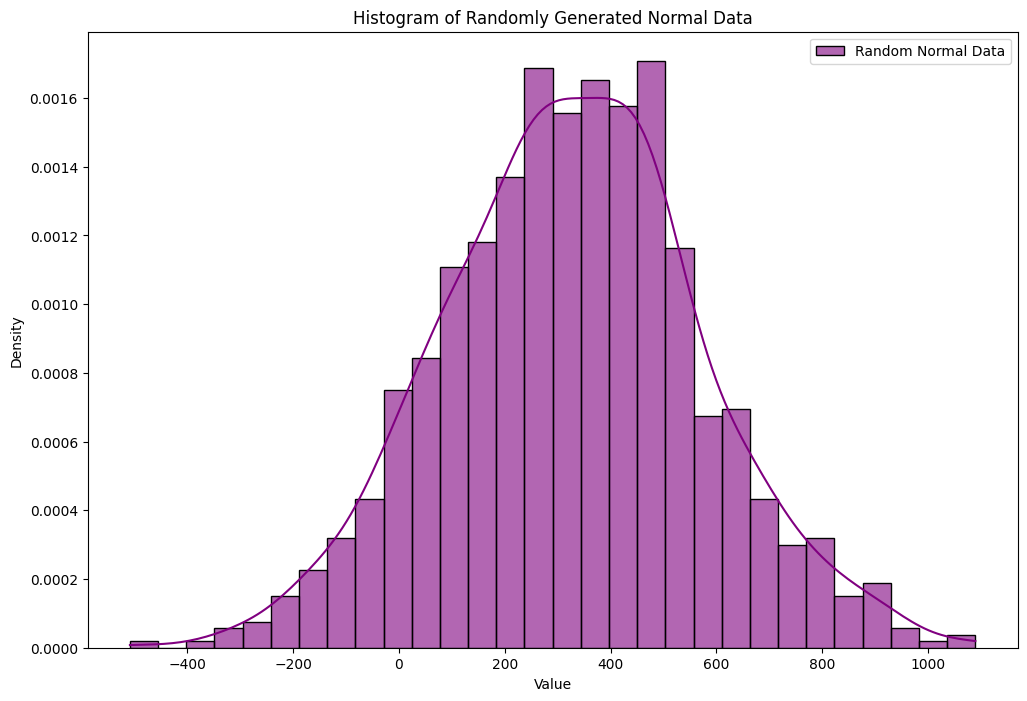

In [14]:
random_data = np.random.normal(mean_value, std_dev_value, 1000)
plt.figure(figsize=(12, 8))
sns.histplot(random_data, kde=True, bins=30, color='purple', alpha=0.6, stat="density", label="Random Normal Data")
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Histogram of Randomly Generated Normal Data")
plt.legend()
plt.show()

In [15]:
# Compute cumulative probability (P(X < mean))
cumulative_prob = norm.cdf(mean_value, mean_value, std_dev_value)
print(f"Cumulative Probability P(X < mean): {cumulative_prob:.4f}")

Cumulative Probability P(X < mean): 0.5000


In [16]:
# Compute the 95th percentile
percentile_95 = norm.ppf(0.95, mean_value, std_dev_value)
print(f"95th Percentile: {percentile_95:.2f}")


95th Percentile: 727.41


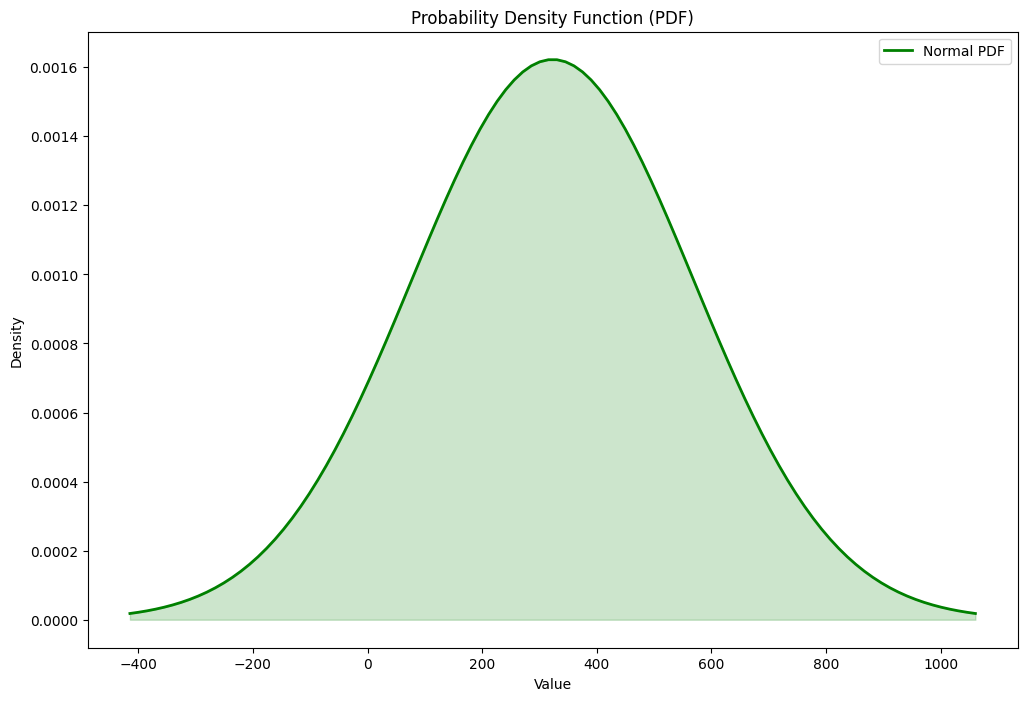

In [17]:
# Compute and plot PDF
x_values = np.linspace(mean_value - 3*std_dev_value, mean_value + 3*std_dev_value, 100)
pdf_values = norm.pdf(x_values, mean_value, std_dev_value)
plt.figure(figsize=(12, 8))
plt.plot(x_values, pdf_values, 'g-', lw=2, label="Normal PDF")
plt.fill_between(x_values, pdf_values, alpha=0.2, color='green')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Probability Density Function (PDF)")
plt.legend()
plt.show()

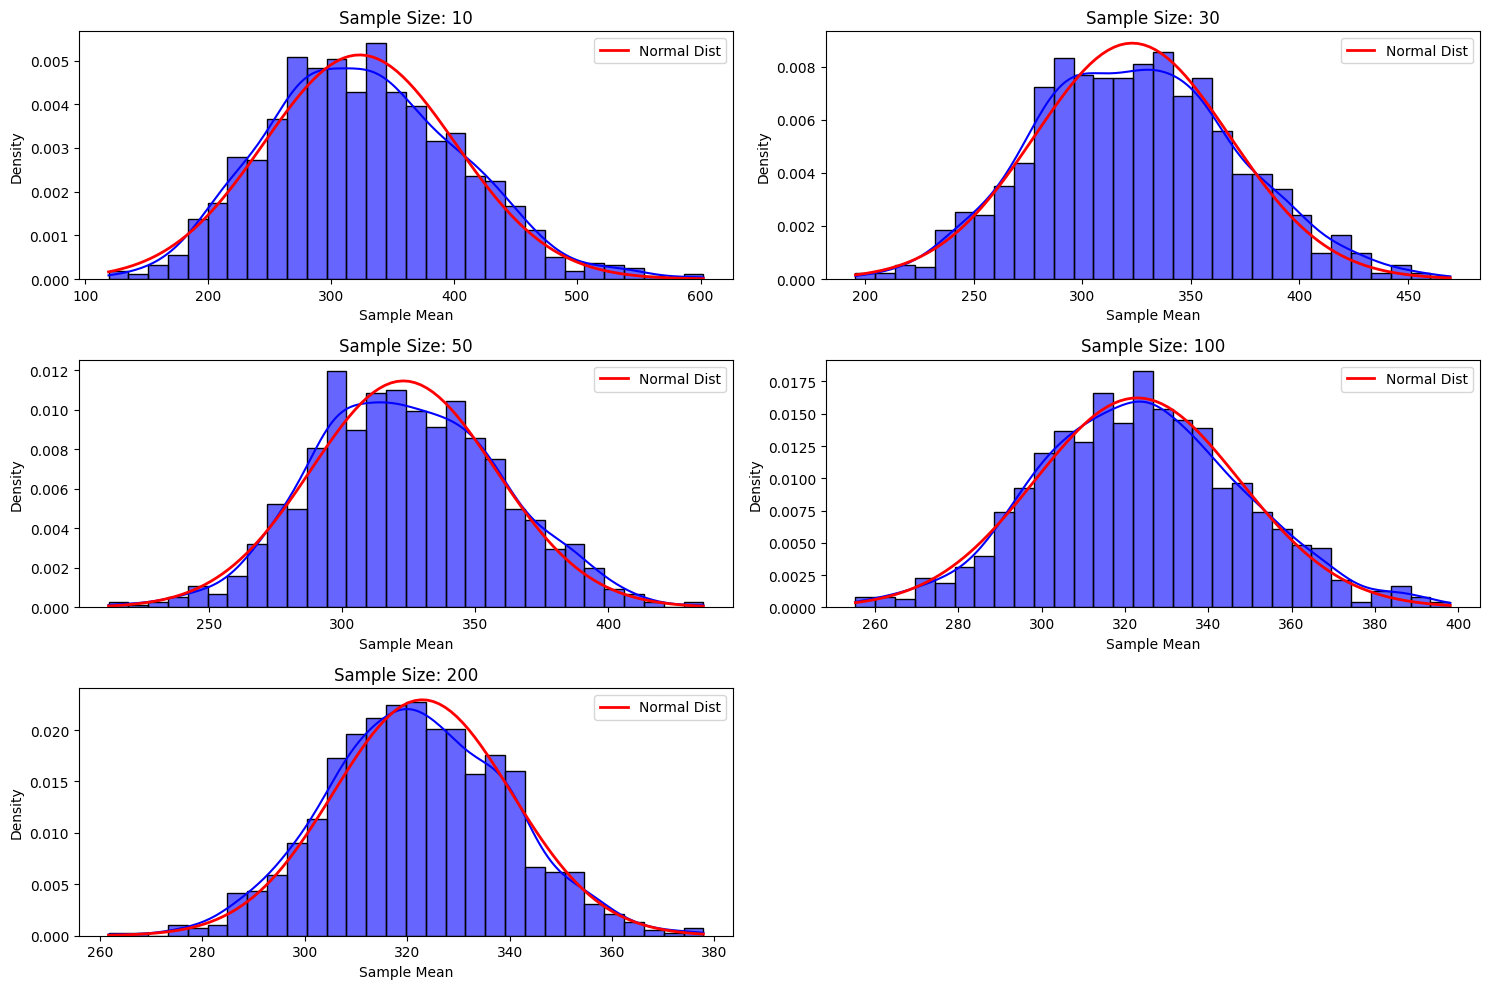

In [18]:
# Verify CLT for different sample sizes
sample_sizes = [10, 30, 50, 100, 200]
num_samples = 1000
plt.figure(figsize=(15, 10))
for i, size in enumerate(sample_sizes, 1):
    sample_means = [df[column].sample(size, replace=True).mean() for _ in range(num_samples)]
    plt.subplot(3, 2, i)
    sns.histplot(sample_means, kde=True, bins=30, stat="density", color="blue", alpha=0.6)
    x = np.linspace(min(sample_means), max(sample_means), 100)
    plt.plot(x, norm.pdf(x, mean_value, std_dev_value/np.sqrt(size)), 'r-', lw=2, label='Normal Dist')
    plt.title(f"Sample Size: {size}")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")
    plt.legend()
plt.tight_layout()
plt.show()

In [19]:
original_skewness = skew(df[column])
original_kurtosis = kurtosis(df[column])
print(f"Original Data Skewness: {original_skewness:.4f}, Kurtosis: {original_kurtosis:.4f}")


Original Data Skewness: 0.8912, Kurtosis: -0.0875


In [20]:
# Compute skewness and kurtosis for sample means
sample_stats = {}
for size in sample_sizes:
    sample_means = [df[column].sample(size, replace=True).mean() for _ in range(num_samples)]
    sample_skewness = skew(sample_means)
    sample_kurtosis = kurtosis(sample_means)
    sample_stats[size] = (sample_skewness, sample_kurtosis)
    print(f"Sample Size {size}: Skewness = {sample_skewness:.4f}, Kurtosis = {sample_kurtosis:.4f}")

Sample Size 10: Skewness = 0.3135, Kurtosis = -0.0448
Sample Size 30: Skewness = 0.2328, Kurtosis = 0.3086
Sample Size 50: Skewness = 0.0753, Kurtosis = -0.2413
Sample Size 100: Skewness = 0.1285, Kurtosis = 0.1149
Sample Size 200: Skewness = 0.1443, Kurtosis = 0.0849


In [21]:
# Compute z-score for the 99th percentile
z_99 = norm.ppf(0.99, mean_value, std_dev_value)
print(f"99th Percentile Value: {z_99:.2f}")

99th Percentile Value: 894.98
